# Final Project: Monocular depth

## 1. Abstract

Self-supervised single-image (monocular) depth-estimation using neural-networks

## 2. Team Members and Contributions

- Alex Wang (j2373wan@uwaterloo.ca)

- Suyeong Choi ()

- Colby Wang ()

## 3. Code Libraries

Libraries

## 4. Demo for Single Image

### Import libraries

In [12]:
%matplotlib notebook
import torch
import torch.optim as optim
from tqdm import tqdm
import matplotlib.image as image
import matplotlib.pyplot as plt

from Unet import UNet
from loss_function import MonocularDepthLoss

### Read Data

<IPython.core.display.Javascript object>


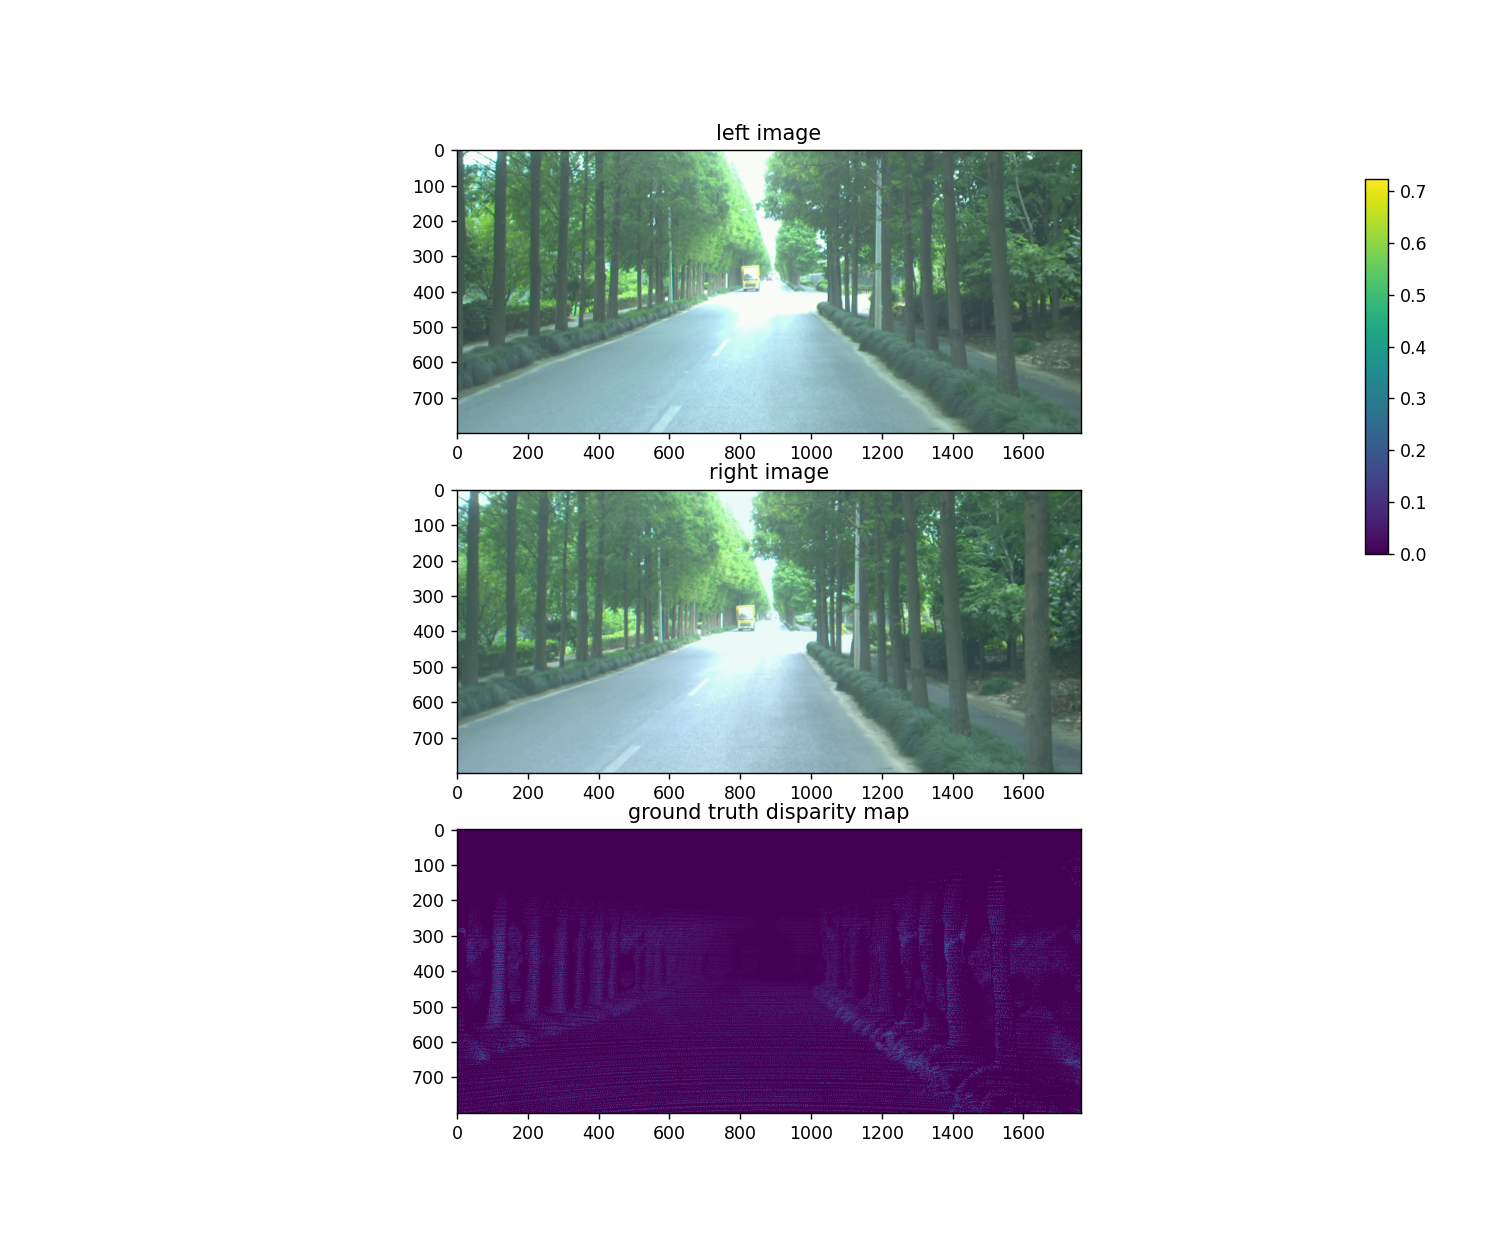

In [17]:
# image_l = image.imread("dataset/image_L/2018-07-11-14-48-52_2018-07-11-15-09-57-367.png")
# print(image_l[0][0][:])
# print(image_l.shape)
# image_l = image_l.reshape(1, 3, image_l.shape[0], image_l.shape[1])
# print(image_l[0][:][0][0])
# print(image_l.shape)

# im_left = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col3.ppm")
# im_gt = image.imread("images/stereo_pairs/tsukuba/truedisp.row3.col3.pgm")
# im_right = image.imread("images/stereo_pairs/tsukuba/scene1.row3.col4.ppm")

im_left = image.imread("dataset/image_L/2018-07-11-14-48-52_2018-07-11-15-09-57-367.png")
im_right = image.imread("dataset/image_R/2018-07-11-14-48-52_2018-07-11-15-09-57-367.png")
im_gt = image.imread("dataset/disparity/2018-07-11-14-48-52_2018-07-11-15-09-57-367.png")

fig = plt.figure(figsize = (12, 10))
plt.subplot(311)
plt.title("left image")
plt.imshow(im_left)
plt.subplot(312) 
plt.title("right image")
plt.imshow(im_right)
plt.subplot(313)
plt.title("ground truth disparity map")
plt.imshow(im_gt)
plt.colorbar(cax=plt.axes([0.91, 0.557, 0.015, 0.3]))
plt.show()

### Training

Training Epochs: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.16it/s]

Training complete. The model should have overfit to the single image.


<IPython.core.display.Javascript object>


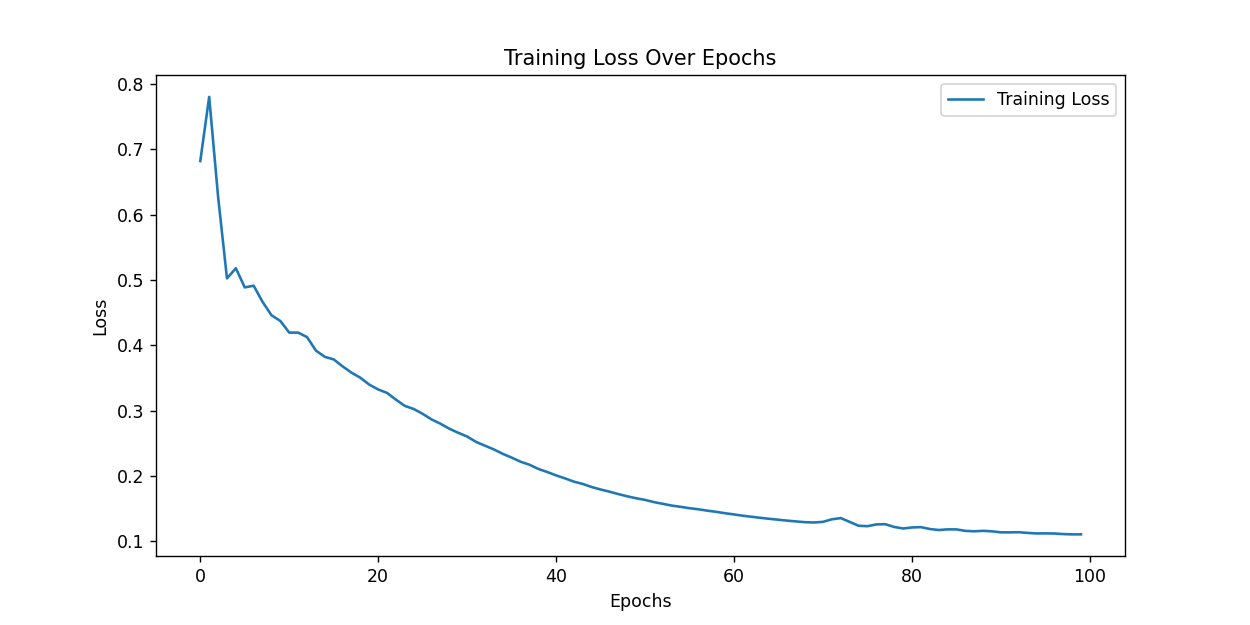

In [1]:
# Initialize the U-Net model and loss function
model = UNet()
loss_function = MonocularDepthLoss()

# Create a dummy left image and right image (single image, HWC format)
image_l = torch.rand(1, 3, 256, 256)  # 256x256 size, 3 channels
image_r = torch.rand(1, 3, 256, 256)  # same as above

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs to train (set high to see if it can overfit)
epochs = 100

# List to record losses
loss_history = []

# Training loop
model.train()  # Set model to training mode
for epoch in tqdm(range(epochs), desc="Training Epochs"):
    optimizer.zero_grad()

    # Forward pass
    right_disparity, left_disparity = model(image_l)

    # Calculate loss
    loss = loss_function(left_disparity, image_r, image_l, right_disparity)
    loss_history.append(loss.item())

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

print("Training complete. The model should have overfit to the single image.")

plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the plot as a PNG file
#plt.savefig('training_loss.png')  # You can specify a different path or file name
plt.show()
# Close the plot
#plt.close()


### Testing

(800, 1762, 3)


<IPython.core.display.Javascript object>


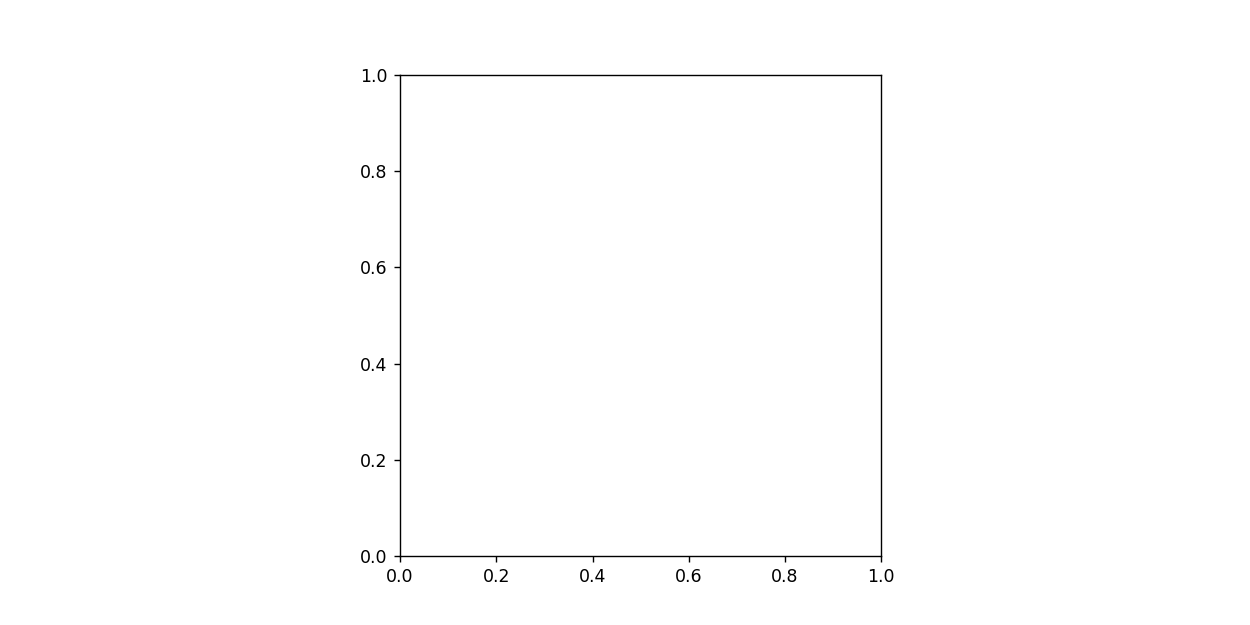

TypeError: Invalid shape (1, 3, 256, 256) for image data

In [4]:
plt.figure(figsize=(10, 5))
plt.imshow(image_l)
plt.show()

# Conclusions

conclusions